## İki saniye periyotlu kare dalga
### Sekil 3.24


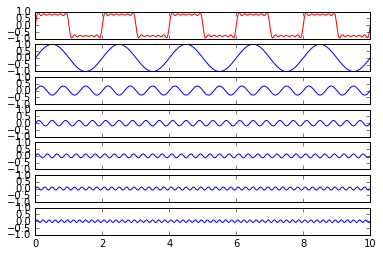

In [4]:
# Tanimlar
import matplotlib.pyplot as plt
import numpy as np

t=np.linspace(0,10, 1000)
freqs=np.r_[0.5:6.5]

fig, ax=plt.subplots(7,1, sharex=True, sharey=True)
sumSines=np.zeros(t.shape);
cnt=1;
for f in freqs:
    s= np.sin(2*np.pi*f*t)/(2*f)
    ax[cnt].plot(t,s)
    sumSines+=s
    cnt+=1
    
ax[0].plot(t,sumSines, 'r')
plt.show()